# A/B Testing

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
plt.style.use('ggplot')

## Load Data

In [11]:
df = pd.read_excel('../data/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.xlsx', head=True)

In [12]:
df.shape

(548, 7)

In [13]:
df.head(15)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


## EDA

In [46]:
df['SalesInThousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

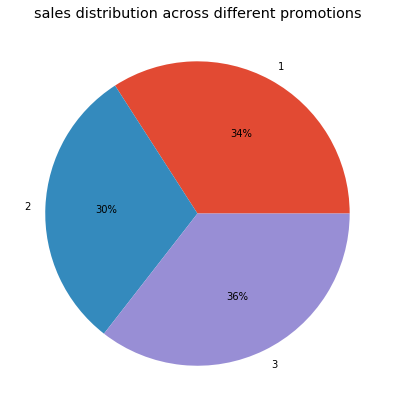

In [47]:
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(7, 7), autopct='%1.0f%%')
ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')
plt.show()

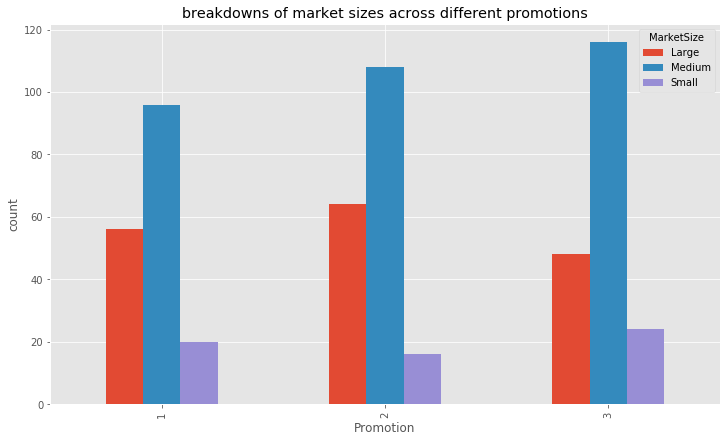

In [49]:
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(kind='bar', figsize=(12, 7))
ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')
plt.show()

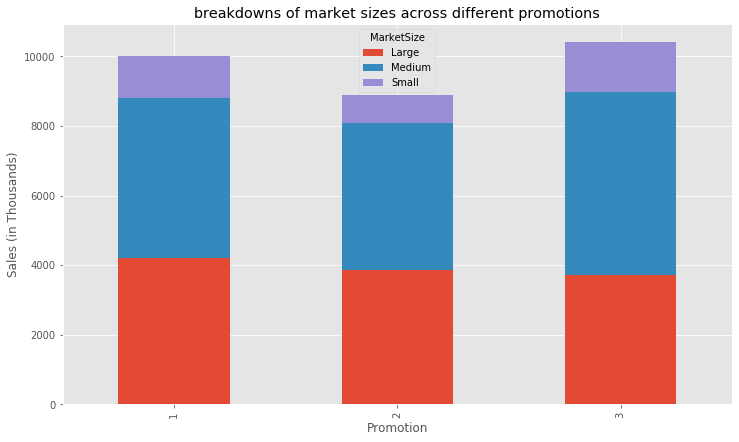

In [50]:
ax = df.groupby(['Promotion', 'MarketSize']).sum()['SalesInThousands'].unstack('MarketSize').plot(kind='bar', figsize=(12, 7), stacked=True)
ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')
plt.show()

## Statistical Significance

In [37]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
    equal_var=False
)

In [38]:
t

6.42752867090748

In [39]:
p

4.2903687179871785e-10

In [43]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)

In [44]:
t

1.5560224307758634

In [45]:
p

0.12059147742229478